# Développement logiciel - HMMA 238


##     Travaux Pratiques Python 

####    Mégane BOYER & Emeline Toustou

# EXERCICE 1: Le jeu de la vie

## Implémentation sans numpy

Nous définissons la fonction $calcul\_nb\_voisins$ dans le fichier utils.py en codant les cellules vivantes par des 1 et les cellules mortes par des 0, puis nous l'appelons.

In [2]:
from utils import calcul_nb_voisins

### Question 4 :

Nous allons appliquer la fonction $calcul\_nb\_voisins$ à la liste Z suivante et expliquer ce que représente la sortie $N=calcul\_nb\_voisins(Z)$.

In [3]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]

In [4]:
N = calcul_nb_voisins(Z)

print(N)

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


La sortie $N=calcul\_nb\_voisins(Z)$ est une liste de listes qui représente le nombre de voisins vivants de chaque cellule n'appartenant pas au pourtour de la grille. En effet, nous avons supposé que le pourtour de la grille est toujours mort : la première et la dernière liste ne sont composées que de 0 et les premiers et sizièmes éléments de chaque liste sont égaux à 0.

Nous définissons maintenant la fonctions $iteration\_jeu$ dans le fichier utils.py.
Cette fonction prend en argument une liste de listes représentant l'état initial du jeu. Elle retourne l'état de ce dernier après une étape du jeu de la vie, c'est-à-dire l'état de chaque cellule (vivante : 1, morte : 0) après une itération du jeu. Nous affichons la docstring de cette fonction.

In [5]:
from utils import iteration_jeu

help(iteration_jeu)

Help on function iteration_jeu in module utils:

iteration_jeu(Z)
    Entrée : Prend en argument une liste de (listes) représentant l'état initial du jeu. 
    Sortie : Retourne une liste de listes correspondant à l'état du jeu à l'étape suivante .
    
    Pour chaque cellule qui n'est pas sur le pourtour de la grille, 
    iteration_jeu détermine le nouvel état de la cellule (vivante ou morte)
    en fonction de son nombre de voisins vivants.
    
    Une cellule morte avec trois voisins vivants exactement nait.
    Une cellule vivante ayant deux ou trois voisins vivants reste en vie.
    Une cellule vivante ayant au moins quatre voisins vivants meurt.
    Une cellule vivante ayant zero ou un voisin vivant meurt.



### Question 5 :

Dans cette question nous nous proposons pour la liste Z ci-dessus, d'afficher les étapes du jeu de 0 à 9 itérations, en utilisant une boucle for.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
    
    
plt.figure(figsize = (10, 5))
Znew = np.copy(Z)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(np.array(Znew))
    Znew = iteration_jeu(Znew)
    plt.title("Itération "+str(i))
    


### Question 6: 
Que remarquez-vous entre l'itération 0 et l'itération 4 ? Que se passe-t-il après l'itération 7 ?


Entre l'itération 0 et l'itération 4, nous observons que les cellules évoluent. Le nombre de cellules vivantes est stable et égal à 5. Les formes se répètent. En effet, nous remarquons que la disposition des cellules vivantes est similaire pour les itérations 0, 2, 4, mais décalée, comme tel est le cas entre les itérations 0 et 4 où les cellules vivantes se sont toutes déplacées d'une cellule en bas et d'une cellule à droite. De plus, les cellules ont parfois changé de sens comme dans l'itération 2. Il en est de même pour les itérations 1 et 3 (même forme mais translatée).
A partir de l'itération 7, le jeu est stable et ne bougera donc plus. En effet, chaque cellule vivante possède trois voisins et reste donc en équilibre à l'itération suivante. Quant aux  cellules mortes, elles n'ont au plus que deux voisins, et ne peuvent donc pas naître. Il n'y aura ainsi aucune évolution dans les prochaines itérations.

## Implémentation avec numba

Nous allons maintenant reprendre la section précédente avec des fonctions utilisant numba et la compilation jit. Puis, nous comparerons les temps de calcul obtenus avec Numba avec ceux obtenus dans la section précédente.

In [7]:
import time
from numba import jit

In [8]:
@jit(nopython=True)

def calcul_nb_voisins(Z):
    """Calcul du nombre de voisins vivants."""
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1] + Z[x][y-1] + Z[x+1][y-1] \
                    + Z[x-1][y] + 0 + Z[x+1][y] \
                    + Z[x-1][y+1] + Z[x][y+1] + Z[x+1][y+1]
    return N

### Question 8 :

Nous allons créer un widget dont le curseur permet de contrôler les itérations du jeu de la vie lorsque nous initialisons avec la matrice suivante.

In [9]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np


Nous commençons par créer la fonction $affichage\_jeu$ qui réalise un nombre d'itérations, donné en argument, du jeu de la vie, en partant de la matrice initiale Z_huge. A l'issue de ces itérations du jeu de la vie, la fonction affiche l'état obtenu du jeu. A l'aide de cette fonction, nous pourrons alors créer le widget dont le curseur contrôle le nombre d'itérations.

In [15]:
def affichage_jeu(iteration = 0):
    """Affichage du jeu après un certain nombre d'itérations (donné en argument) du jeu de la vie."""
    Z = Z_huge
    plt.figure(figsize = (10, 5))
    for i in range(iteration):
        Z = iteration_jeu(Z)
    plt.imshow(Z)


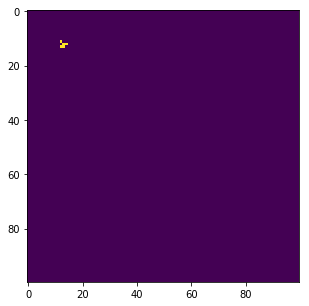

In [16]:
affichage_jeu(0)

In [14]:
from ipywidgets import interact

interact(affichage_jeu, iteration = (0, 30, 1));

interactive(children=(IntSlider(value=0, description='iteration', max=30), Output()), _dom_classes=('widget-in…

## EXERCICE 2 : Regression Logistique

### Question 1: 

In [ ]:
import sklearn
sklearn.__version__ 

In [ ]:
from sklearn.datasets import fetch_openml
from random import randint

In [ ]:
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float64') #normalement il s'agit déjà de flottant dans cette version. 
y = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings.
#y = mnist.target


In [ ]:
mnist.keys()

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X

In [ ]:
y

Autre façon:

In [ ]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
X

In [ ]:
y

### Question 2:
    
Transformer X et y pour ne garder que les cas des chi􏰀ffres 3 et 7:

In [ ]:
classe_3 = np.array(y==3)
classe_7 = np.array(y==7)
classe_3_7 = classe_3 + classe_7  #On somme terme à terme pour ne garder que les cas des chiffres 3 et 7

X_3_7 = X[classe_3_7]
y_3_7 = y[classe_3_7]


Visualisons avec imshow un exemple de chaque classe d'image (un X donc), en utilisant un reshape adapté.

In [ ]:
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    img = (X_3_7[randint(0,len(X_3_7)-1)].reshape((28,28)))
    plt.imshow(img, cmap=plt.cm.gray)

### Question 3:

Utilisons la fonction LogisticRegression pour apprendre un modèle de classi􏰅cafication sur l'intégralité des données. (on choisira un cas sans ordonnée à l'origine, i.e., l'option fit_intercept=False)

In [ ]:
#from sklearn.linear_model import LogisticRegression
#logisticRegr = LogisticRegression(fit_intercept = False, solver='lbfgs')
#logisticRegr.fit(X_3_7, y_3_7)

from sklearn import linear_model
logisticRegr= linear_model.LogisticRegression(fit_intercept=False)
logisticRegr.fit(X_3_7, y_3_7)

In [ ]:
logisticRegr.coef_.shape

In [ ]:
X_3_7.shape